In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.rcParams['figure.dpi'] = 300
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None) # 显示所有列
from tqdm.notebook import tqdm
# import geopandas as gpd
# import transbigdata as tbd
# import geoplot as gplt

In [2]:
park_data = pd.read_csv('../park_data.csv')

In [33]:
for i in tqdm(range(10,21)):
    #初始抓取时间设定为2min抓取一次，起始时间为2018-03-07 00:00:00，结束时间为2018-03-07 23:59:59
    timestamp_array= pd.date_range('2018-03-07 00:00:00','2018-03-07 23:59:59',freq='%dT'%i)
    print('存储路径为：  E:/yongqi/mobike/park_to_location_data/park2location_%d.csv'%i)
    
    # 曼哈顿距离
    cos_lat = np.cos(30.656883854354138/180 * np.pi) * 111000 # 米
    def mhd_dis(lng1, lat1, lng2, lat2):
        lng_dis = cos_lat * abs(lng1-lng2)
        lat_dis = 111000 * abs(lat1-lat2)
        return lng_dis + lat_dis
    park_data['mhd_trip_distance']=park_data.apply(lambda x:mhd_dis(x['endlng'], x['endlat'], x['startlng'], x['startlat'])/1000,axis=1)

    park_data['park_starttime'] = pd.to_datetime(park_data['park_starttime'])
    park_data['park_endtime'] = pd.to_datetime(park_data['park_endtime'])

    #考虑停车距离
    #设置距离阈值
    distance_threshold = 100
    #设置空列表
    timestamp_list = []
    bikeid_list = []
    startlng_list = []
    startlat_list = []
    #对时间戳进行循环
    for timestamp in tqdm(timestamp_array):
        #将停放数据分成两种处理，分别是temp_data1和temp_data2
        #一种是由于GPS漂移造成的停放数据经纬度误差，采用起点和终点的中心作为位置数据中的经纬度
        temp_data1 = park_data[(timestamp>=park_data['park_starttime'])&(timestamp<=park_data['park_endtime'])&(park_data['mhd_trip_distance']<=distance_threshold)]
        temp_data1['timestamp'] = timestamp
        temp_data1['location_lng'] = (temp_data1['startlng'] + temp_data1['endlng'])/2
        temp_data1['location_lat'] = (temp_data1['startlat'] + temp_data1['endlat'])/2
        timestamp_list.extend(list(temp_data1['timestamp'])) 
        bikeid_list.extend(list(temp_data1['bikeid']))
        startlng_list.extend(list(temp_data1['location_lng']))
        startlat_list.extend(list(temp_data1['location_lat']))
        #另一种是由于再掉度造成的停放数据经纬度误差，对这部分数据，采用前半段时间在起点，后半段时间在终点作为位置数据中的经纬度
        temp_data2 = park_data[(timestamp>=park_data['park_starttime'])&(timestamp<=park_data['park_endtime'])&(park_data['mhd_trip_distance']>distance_threshold)]
        temp_data2['timestamp'] = timestamp
        temp_data2['mid_time'] = temp_data2['park_starttime'] + (temp_data2['park_endtime'] - temp_data2['park_starttime'])/2 #构造时间中点
        temp_data2_1 = temp_data2[(timestamp>=temp_data2['park_starttime'])&(timestamp<temp_data2['mid_time'])]
        timestamp_list.extend(list(temp_data2_1['timestamp'])) 
        bikeid_list.extend(list(temp_data2_1['bikeid']))
        startlng_list.extend(list(temp_data2_1['startlng']))
        startlat_list.extend(list(temp_data2_1['startlat']))
        temp_data2_2 = temp_data2[(timestamp>=temp_data2['mid_time'])&(timestamp<=temp_data2['park_endtime'])]
        timestamp_list.extend(list(temp_data2_2['timestamp'])) 
        bikeid_list.extend(list(temp_data2_2['bikeid']))
        startlng_list.extend(list(temp_data2_2['endlng']))
        startlat_list.extend(list(temp_data2_2['endlat']))


    c={'timestamp' : timestamp_list,'bikeid' : bikeid_list,'startlng' : startlng_list,'startlat' : startlat_list}#将列表a，b转换成字典
    location_data=pd.DataFrame(c)#将字典转换成为数据框

    location_data.rename(columns={'startlng':'geom_lon','startlat':'geom_lat'},inplace=True)
    print('location_data.shape:',location_data.shape)
    location_data.sort_values(by=['bikeid','timestamp'],inplace=True)
    print('排序完成')
    location_data.to_csv('E:/yongqi/mobike/park_to_location_data/park2location_%d.csv'%i,index=False)
    print('保存完成')

  0%|          | 0/11 [00:00<?, ?it/s]

存储路径为：  E:/yongqi/mobike/park_to_location_data/park2location_10.csv


  0%|          | 0/144 [00:00<?, ?it/s]

location_data.shape: (18196199, 4)
排序完成
保存完成
存储路径为：  E:/yongqi/mobike/park_to_location_data/park2location_11.csv


  0%|          | 0/131 [00:00<?, ?it/s]

location_data.shape: (16553835, 4)
排序完成
保存完成
存储路径为：  E:/yongqi/mobike/park_to_location_data/park2location_12.csv


  0%|          | 0/120 [00:00<?, ?it/s]

location_data.shape: (15164242, 4)
排序完成
保存完成
存储路径为：  E:/yongqi/mobike/park_to_location_data/park2location_13.csv


  0%|          | 0/111 [00:00<?, ?it/s]

location_data.shape: (14027828, 4)
排序完成
保存完成
存储路径为：  E:/yongqi/mobike/park_to_location_data/park2location_14.csv


  0%|          | 0/103 [00:00<?, ?it/s]

location_data.shape: (13016064, 4)
排序完成
保存完成
存储路径为：  E:/yongqi/mobike/park_to_location_data/park2location_15.csv


  0%|          | 0/96 [00:00<?, ?it/s]

location_data.shape: (12132609, 4)
排序完成
保存完成
存储路径为：  E:/yongqi/mobike/park_to_location_data/park2location_16.csv


  0%|          | 0/90 [00:00<?, ?it/s]

location_data.shape: (11373729, 4)
排序完成
保存完成
存储路径为：  E:/yongqi/mobike/park_to_location_data/park2location_17.csv


  0%|          | 0/85 [00:00<?, ?it/s]

location_data.shape: (10743106, 4)
排序完成
保存完成
存储路径为：  E:/yongqi/mobike/park_to_location_data/park2location_18.csv


  0%|          | 0/80 [00:00<?, ?it/s]

location_data.shape: (10109538, 4)
排序完成
保存完成
存储路径为：  E:/yongqi/mobike/park_to_location_data/park2location_19.csv


  0%|          | 0/76 [00:00<?, ?it/s]

location_data.shape: (9604843, 4)
排序完成
保存完成
存储路径为：  E:/yongqi/mobike/park_to_location_data/park2location_20.csv


  0%|          | 0/72 [00:00<?, ?it/s]

location_data.shape: (9098982, 4)
排序完成
保存完成


In [12]:
df = pd.read_csv('E:/yongqi/mobike/trip_data_3_7.csv')
df.shapepe

(700555, 8)

In [24]:
df['starttime'] = pd.to_datetime(df['starttime'])
df['endtime'] = pd.to_datetime(df['endtime'])
df['duration'] = (df['endtime'] - df['starttime']).dt.seconds

In [32]:
df['duration'].describe()

count    700555.000000
mean        704.753083
std         884.294214
min          60.000000
25%         290.000000
50%         479.000000
75%         834.000000
max       43856.000000
Name: duration, dtype: float64

In [31]:
df['duration'].quantile(0.6)

586.0

(array([6.96268e+05, 3.45700e+03, 4.65000e+02, 1.53000e+02, 8.00000e+01,
        5.40000e+01, 3.60000e+01, 2.00000e+01, 1.60000e+01, 6.00000e+00]),
 array([   60. ,  4439.6,  8819.2, 13198.8, 17578.4, 21958. , 26337.6,
        30717.2, 35096.8, 39476.4, 43856. ]),
 <BarContainer object of 10 artists>)

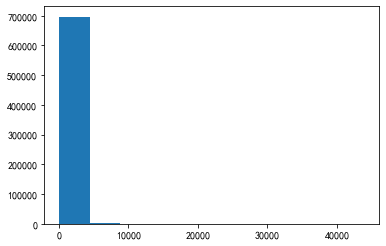

In [25]:
plt.hist(df['duration'])

  0%|          | 0/360 [00:00<?, ?it/s]

location_data.shape: (45490991, 4)
排序完成
保存完成
